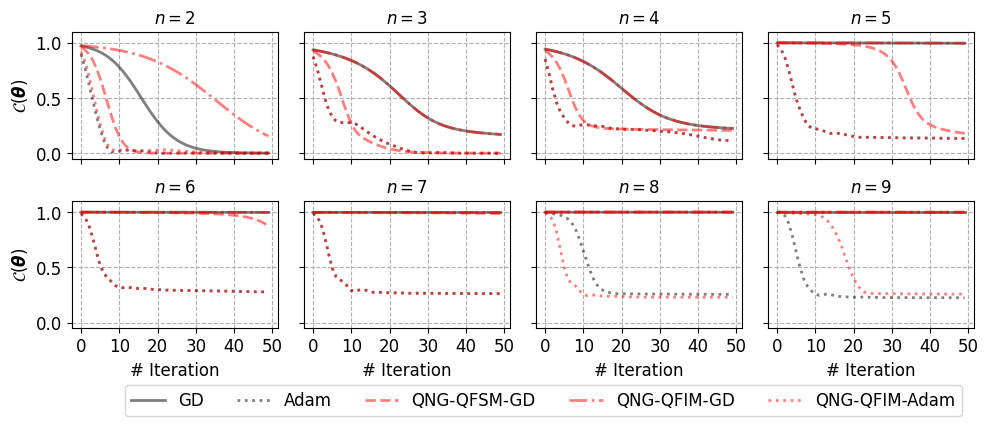

In [6]:
import matplotlib.pyplot as plt
import numpy as np
labels = ['GD', 'Adam', 'QNG-QFSM-GD', 'QNG-QFIM-GD', 'QNG-QFIM-Adam']
line_styles = ['solid', 'dotted', 'dashed', 'dashdot', 'dotted']
colors = ['black', 'black', 'red', 'red', 'red']
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize=(10, 4))
j = 0
for num_qubit in range(2,10):
    row = j // 4
    col = j % 4
    loss = np.loadtxt(f"../data/loss/loss_{num_qubit}qubit_1layer_g2gn.txt")
    for i in range(len(labels)):
        axs[row, col].plot(loss[i], linewidth = 2, color = colors[i], linestyle = line_styles[i], label = labels[i], alpha = 0.5)
    axs[row, col].set_title(rf"$n={num_qubit}$", fontsize = 12)
    axs[row, col].set_xticks([0, 10, 20, 30, 40, 50])
    axs[row, col].tick_params(axis='x', labelsize=12)
    axs[row, col].tick_params(axis='y', labelsize=12)
    if row == 0:
        axs[row, col].set_xticklabels([])
    if row == 1:
        axs[row, col].set_xlabel("# Iteration", fontsize = 12)
    if col == 0:
        axs[row, col].set_ylabel(r"$\mathcal{C} (\boldsymbol{\theta})$", fontsize = 12)
    else:
        axs[row, col].set_yticklabels([])
    axs[row, col].set_ylim(-0.05, 1.1)
    axs[row, col].grid(linestyle = '--')
    j += 1
plt.tight_layout()
plt.legend(ncol = 5, loc = 'upper center', bbox_to_anchor = (-1.09, -0.38), fontsize = 12)
plt.savefig("../data/images/loss_basic_1.svg", bbox_inches='tight')
    

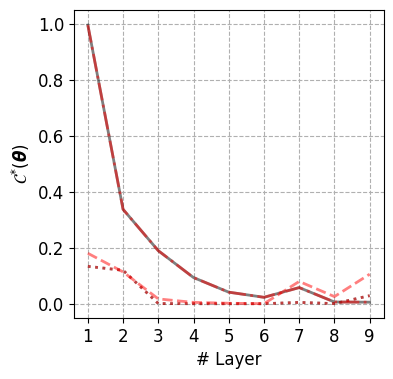

In [9]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(4, 4))
losss = np.zeros((5, 9))
for num_layer in range(1, 10):
    loss = np.loadtxt(f"../data/loss/loss_5qubit_{num_layer}layer_g2gn.txt")
    for i in range(len(labels)):
        losss[i][num_layer-1] = loss[i][-1]   

for i, optimizer in enumerate(labels):
    axs.plot(list(range(1,10)), losss[i][:], linewidth = 2, color = colors[i], linestyle = line_styles[i], label = labels[i], alpha = 0.5)

    axs.set_xticks(list(range(1, 10)))
    axs.tick_params(axis='x', labelsize=12)
    axs.tick_params(axis='y', labelsize=12)
    axs.set_xlabel("# Layer", fontsize = 12)
    axs.set_ylabel(r"$\mathcal{C}^{*}(\boldsymbol{\theta})$", fontsize = 12)
    axs.set_ylim(-0.05, 1.05)
    axs.grid(linestyle = '--')
plt.savefig("../data/images/loss_basic_2.svg", bbox_inches='tight')
    